In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
display(train.head())
print('--'*40)
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


--------------------------------------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




Since test.csv is a final testing dataset, I will use the train dataset to split data and build the model with Survived as the response vector




In [4]:
df = train
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# From above, I can see there are 5 categorical data. Also column Age, Cabin, and Embarked have missing values. 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### EDA

<function matplotlib.pyplot.show(*args, **kw)>

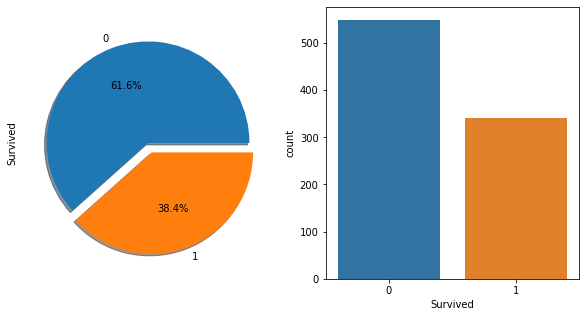

In [7]:
# First look at the target variable. 0 means did not survive. 1 means survived.

f,ax=plt.subplots(1,2, figsize = (10,5))
sns.countplot(x=df['Survived'])
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
plt.show

Not a lot of many people survived. Only 38.4% did. 

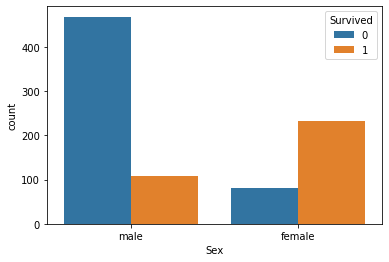

In [8]:
# Distribution of gender groupby survived 

sns.countplot(x=df['Sex'], hue = df['Survived'])

In [9]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

There were more male passengers compared to female. However, more female passengers got saved. In fact, the number of female passengers who got saved is almost twice the number of male. It seems that 'sex' is correlated to 'survived'

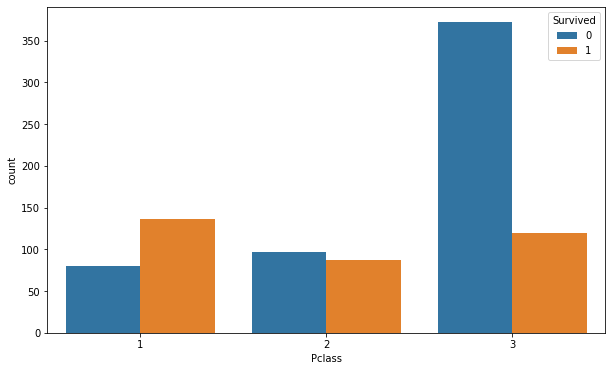

In [10]:
# Passenger Class with the target variable 
plt.figure(figsize = (10,6))
sns.countplot(x='Pclass',data=df,hue = 'Survived')

In [11]:
pd.crosstab(df['Pclass'],df['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


There are less 'First Class' passengers, but more than half of them got saved. Most passengers are 'Third Class' passengers, but the number of survival is less than which of '1st Class'. Surely, Pclass will affect the outcome of the target variable. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

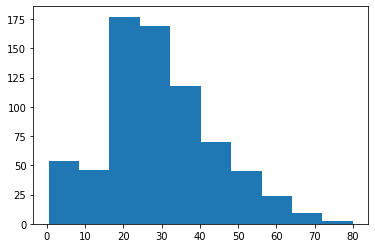

In [12]:
# Most passengers are in the age of 20-30

plt.hist(df['Age'])

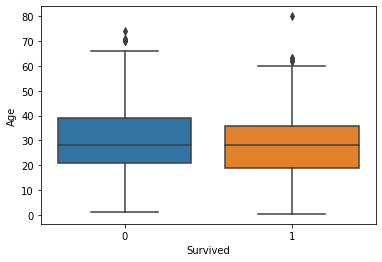

In [13]:
sns.boxplot(x='Survived',y='Age',data=df)

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

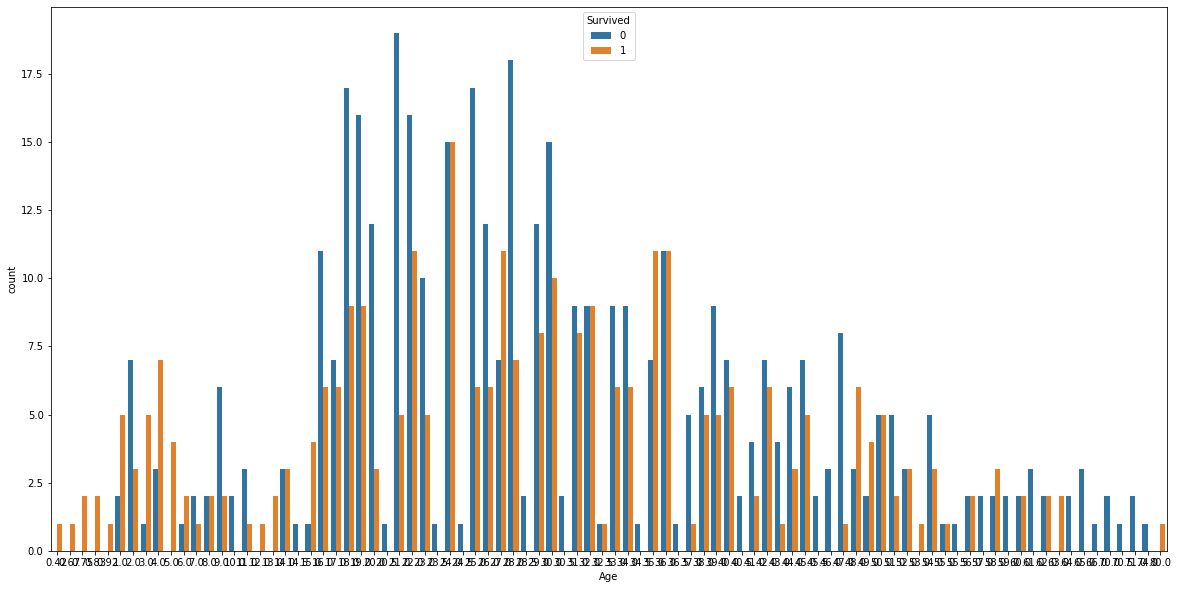

In [15]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Age", data = df, hue = "Survived")

Survived passengers are mostly toward the younger groups compared to the older groups. Most survivors are in the group of 20s. There are many nulls with the Age column. I do not think it is a wise choice to assign all of the missing rows with the mean which is 29 because that passenger could be an infant also. I think I can look at the 'Name' column to see what title is given such as Miss, Mrs, or Mr. When preparing the data, I can give the average age of those group for the respective rows

In [16]:
# Embark - Port of embarkation 

df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
pd.crosstab(df['Embarked'],df['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


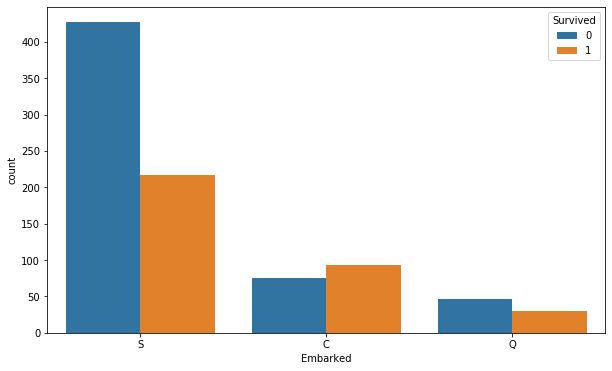

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "Embarked", data = df, hue = "Survived")

Most people boarded from port S. More people board from port C survived compare to port S and Q. There are some missing values in Embarked columns. I will fill it with port S because more people boarded from there. 

In [20]:
# SibSp -> Siblings and Spouse

pd.crosstab(df['SibSp'],df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


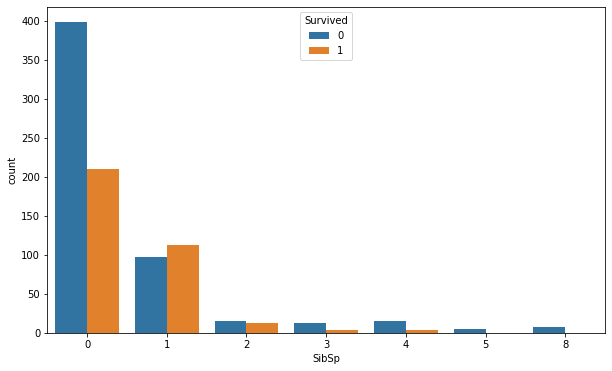

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "SibSp", data = df, hue = "Survived")

If a passenger is alone, or have no siblings or spouse, he/she has higher chance to survive. As the number of 'SibSp' increases, the lesser the chance for that person to survive. 

In [22]:
# Parch -> Parents and Children

pd.crosstab(df['Parch'],df['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


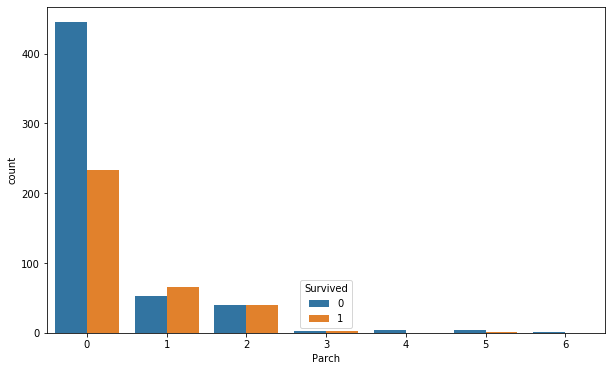

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "Parch", data = df, hue = "Survived")

Similar to 'SibSp' trend can be seen here. Surprisingly, people with 1 family member have better chances to survive. 

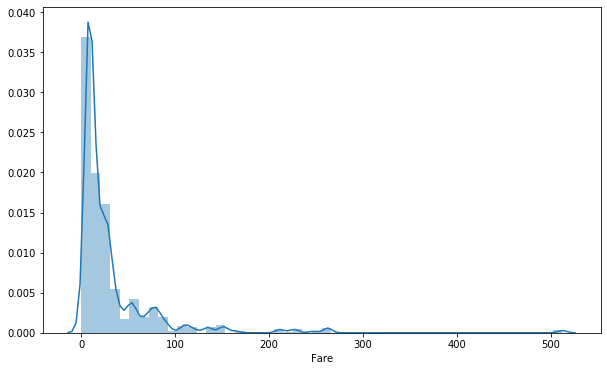

In [27]:
# Fare

plt.figure(figsize=(10, 6))
sns.distplot(df['Fare'])

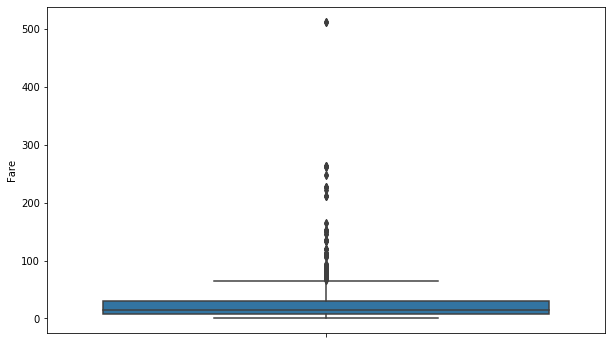

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Fare',data=df)

In [31]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

There is a wide spread of fare. There are also many outliers. 

### Correlation Between The Features

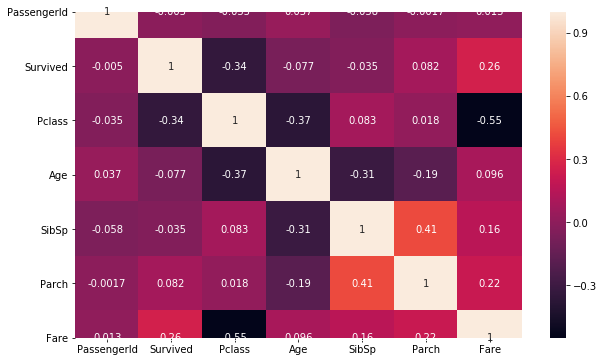

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True) 
plt.show()

The features are not much correlated. The highest correlation is 0.41 which is between SibSp and Parch.

### Fill in Null values

In [33]:
# As said above, I will assign missing age values based on the titles of the person's name 

df['Title'] = 0
for i in df:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')  #I searched up extract and Regex 
    
    #'([A-Za-z]+)\.' => Search and get String starts with upper case follow by lower case and end with .
    

In [34]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [39]:
# There are some unfamiliar titles such as Don, Rev,Mme, Mlle. Use crosstab to figure out their gender 

pd.crosstab(df['Title'],df['Sex']).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [43]:
# Replace them with Mr., Miss,Dr., and Mrs. 

df['Title'].replace(['Capt','Col','Countess','Don','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],['Mr','Mr','Mrs','Mr','Mr','Mrs','Mr','Miss','Miss','Miss','Mr','Mr'],inplace=True)

In [45]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [46]:
df.groupby('Title')['Age'].mean()

Title
Dr        42.000000
Master     4.574167
Miss      21.860000
Mr        32.891990
Mrs       35.981818
Name: Age, dtype: float64

In [54]:
# Assigning the Nulls with the the mean ages

df.loc[(df['Age'].isnull())&(df['Title']=='Mr'),'Age']=33
df.loc[(df['Age'].isnull())&(df['Title']=='Mrs'),'Age']=36
df.loc[(df['Age'].isnull())&(df['Title']=='Master'),'Age']=5
df.loc[(df['Age'].isnull())&(df['Title']=='Miss'),'Age']=22
df.loc[(df['Age'].isnull())&(df['Title']=='Dr'),'Age']=46

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [57]:
# Since most passenger boarded from port S, I will assign the two missing rows with S

df['Embarked'].fillna('S',inplace=True)

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Dropping unnecessary features 

Name, Ticket (a random String), Cabin, PassengerID 

In [59]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [60]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### Convert category data into numeric

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df['Title']=le.fit_transform(df['Title'])

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,3
1,1,1,0,38.0,1,0,71.2833,0,4
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,4
4,0,3,1,35.0,0,0,8.0500,2,3


### Logistic Regression Model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
# feature matrix and response vector 

x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [67]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,2,3
1,1,0,38.0,1,0,71.2833,0,4
2,3,0,26.0,0,0,7.9250,2,2
3,1,0,35.0,1,0,53.1000,2,4
4,3,1,35.0,0,0,8.0500,2,3


In [68]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [69]:
# split train and test 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 66)

In [70]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [72]:
result = pd.DataFrame({'Actual':y_test.values.flatten(),'Prediction':pred.flatten()})
result.head()

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [75]:
confusion_matrix(y_test,pred)

array([[150,  25],
       [ 29,  64]], dtype=int64)

In [76]:
accuracy_score(y_test,pred)

0.7985074626865671